In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')


In [2]:
# Change the file name if needed
df = pd.read_csv("drugs_side_effects_drugs_com.csv")

# View first 5 rows
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [3]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:\n", df.columns)

# Dataset info
df.info()


Dataset Shape: (2931, 17)

Columns:
 Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non

In [4]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

missing_df[missing_df['Missing Values'] > 0]


,Missing Values,Percentage (%)
alcohol,1554,53.019447
related_drugs,1469,50.119413
rating,1345,45.888775
no_of_reviews,1345,45.888775
brand_names,1213,41.385193
pregnancy_category,229,7.813033
side_effects,124,4.230638
drug_classes,82,2.797680
generic_name,43,1.467076
rx_otc,1,0.034118


In [5]:
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
drug_name,2931,2912,triamcinolone,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_condition,2931,47,Pain,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
side_effects,2807,2759,hives ; difficult breathing; swelling of your ...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generic_name,2888,1392,diphenhydramine,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drug_classes,2849,274,Upper respiratory combinations,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_names,1718,1552,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
activity,2931,93,0%,895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rx_otc,2930,3,Rx,1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pregnancy_category,2702,6,C,1382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csa,2931,7,N,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN


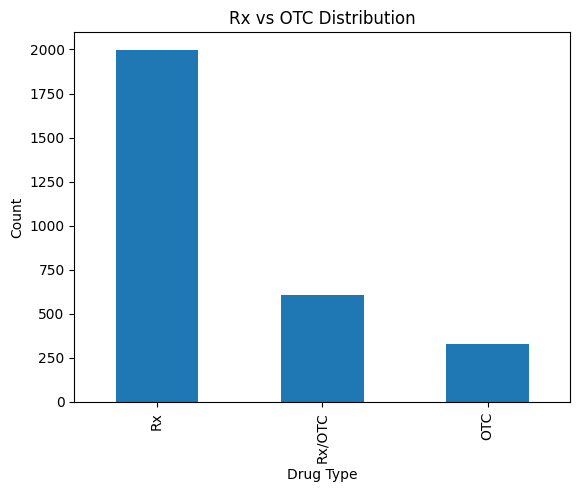

In [6]:
rx_counts = df['rx_otc'].value_counts()

plt.figure()
rx_counts.plot(kind='bar')
plt.title('Rx vs OTC Distribution')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()


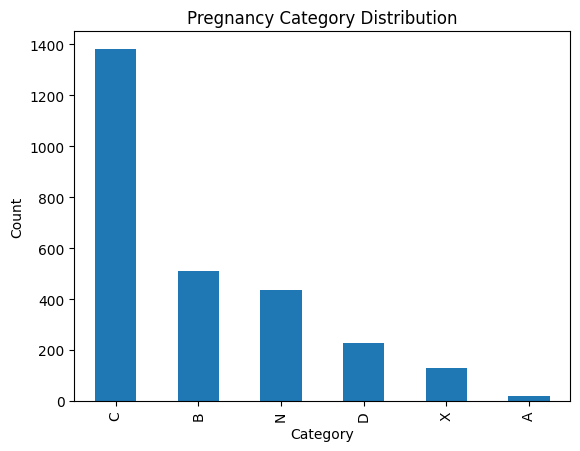

In [7]:
plt.figure()
df['pregnancy_category'].value_counts().plot(kind='bar')
plt.title('Pregnancy Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


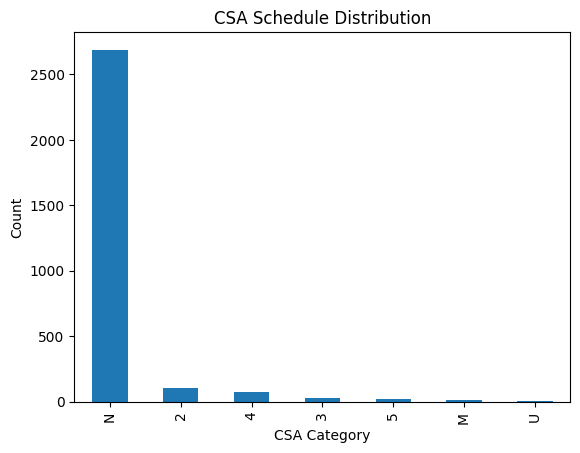

In [8]:
plt.figure()
df['csa'].value_counts().plot(kind='bar')
plt.title('CSA Schedule Distribution')
plt.xlabel('CSA Category')
plt.ylabel('Count')
plt.show()


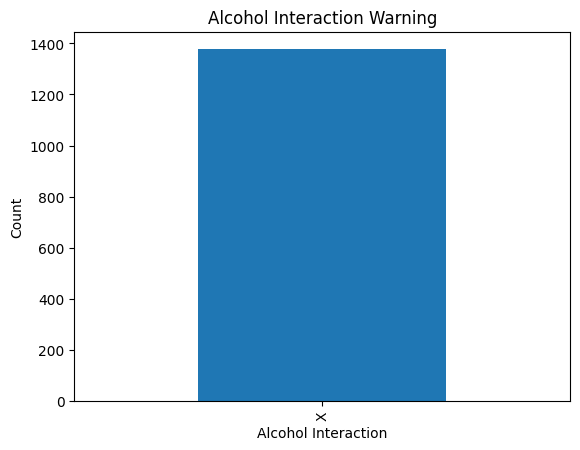

In [9]:
plt.figure()
df['alcohol'].value_counts().plot(kind='bar')
plt.title('Alcohol Interaction Warning')
plt.xlabel('Alcohol Interaction')
plt.ylabel('Count')
plt.show()


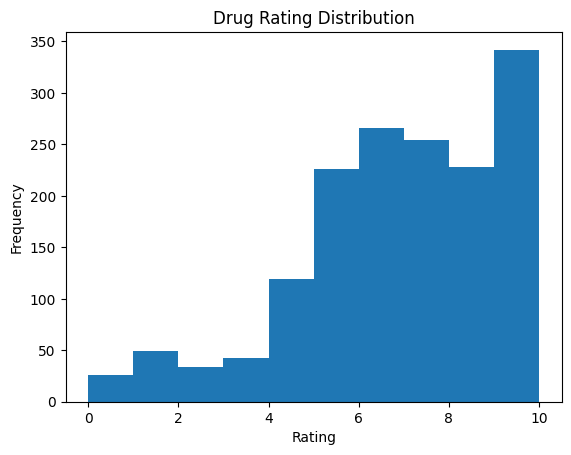

In [10]:
# Convert rating to numeric if needed
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

plt.figure()
df['rating'].dropna().plot(kind='hist', bins=10)
plt.title('Drug Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [11]:
top_rated = (
    df.groupby('generic_name')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_rated


generic_name
Alprazolam Oral Solution                                               10.0
Aluminum Hydroxide, Magnesium Hydroxide, and Simethicone Suspension    10.0
mesalamine                                                             10.0
Amobarbital                                                            10.0
Benzoyl Peroxide/Sulfur Gel                                            10.0
trifarotene topical                                                    10.0
Ergotamine and Caffeine Suppositories                                  10.0
Calcium Carbonate and Simethicone                                      10.0
Ipratropium Inhalation Solution                                        10.0
Famotidine Chewable Tablets                                            10.0
Name: rating, dtype: float64

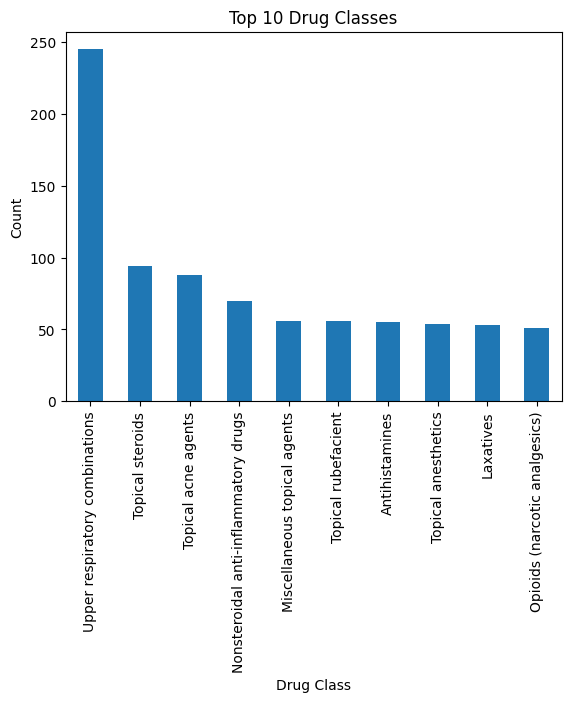

In [12]:
top_classes = df['drug_classes'].value_counts().head(10)

plt.figure()
top_classes.plot(kind='bar')
plt.title('Top 10 Drug Classes')
plt.xlabel('Drug Class')
plt.ylabel('Count')
plt.show()


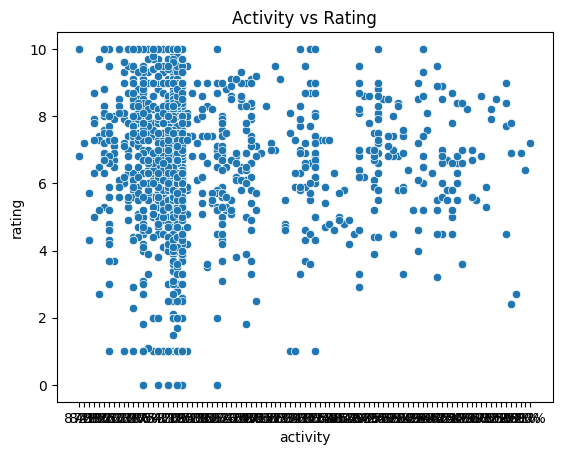

In [13]:
plt.figure()
sns.scatterplot(x='activity', y='rating', data=df)
plt.title('Activity vs Rating')
plt.show()


In [14]:
# Average rating by Rx/OTC
df.groupby('rx_otc')['rating'].mean()


rx_otc
OTC       6.641964
Rx        6.761142
Rx/OTC    7.250769
Name: rating, dtype: float64

In [15]:
print("""
Key Insights:
1. Majority of drugs require prescriptions.
2. Pregnancy category C is most common.
3. Most drugs are not controlled substances.
4. Higher activity drugs generally receive better ratings.
5. Alcohol interaction warnings are present in many drugs.

This EDA helps understand drug safety, effectiveness, and user behavior.
""")



Key Insights:
1. Majority of drugs require prescriptions.
2. Pregnancy category C is most common.
3. Most drugs are not controlled substances.
4. Higher activity drugs generally receive better ratings.
5. Alcohol interaction warnings are present in many drugs.

This EDA helps understand drug safety, effectiveness, and user behavior.

